# Working with Harmonic Annotations

In [1]:
import pandas as pd
import pitchtypes as pt # this requires the development branch of pitchtypes
import seaborn as sns
import dimcat as dc
import logging
log = logging.getLogger()
log.setLevel(logging.WARNING)

## Load corpus

Use dimcat's `Corpus` class to load a dataset.
Each corpus consists of several subcorpora (here only `ABC`),
which in turn consist of several pieces (here `n01_op18-1_01`, `n01_op18-1_02`, etc.).

A `Corpus` has several representations of each piece (e.g. a list of chord labels or a list of notes) called *facets*.
Each facet is represented by a dataframe.

Corpora can be processed, e.g. slicing notes according to different criteria (see below).
The output of these operations is again a corpus with facets.

In [2]:
# this takes some time because it parses the original data, not the preprocessed tsv files
corpus = dc.Corpus()
corpus.load("./ABC")
corpus.data

282 files.
KEY -> EXTENSIONS
-----------------
ABC -> {'.mscx': 71, '.tsv': 211}

None of the 71 score files have been parsed.

All 211 tabular files have been parsed, 70 of them as Annotations object(s).
KEY -> ANNOTATION LAYERS
------------------------
ABC -> staff  voice  harmony_layer  color  
    -> 4      1      1 (dcml)       default    27362
    -> 1      1      0 (dcml)       default      731

## Get notes

In [3]:
notes = corpus.get_facet("notes")
notes

quarterbeats  duration_qb   mc   mn  \
corpus fname        interval                                               
ABC    n01op18-1_01 [0.0, 1.0)                  0          1.0    1    1   
                    [0.0, 1.0)                  0          1.0    1    1   
                    [0.0, 1.0)                  0          1.0    1    1   
                    [0.0, 1.0)                  0          1.0    1    1   
                    [1.0, 1.5)                  1          0.5    1    1   
...                                           ...          ...  ...  ...   
       n16op135_04  [1146.0, 1147.0)         1146          1.0  283  282   
                    [1146.0, 1147.0)         1146          1.0  283  282   
                    [1146.0, 1147.0)         1146          1.0  283  282   
                    [1146.0, 1147.0)         1146          1.0  283  282   
                    [1146.0, 1147.0)         1146          1.0  283  282   

                                     mc_onset mn_onset timesig  staff  voice  \
corpus fname        interval                                                   
ABC    n01op18-1_01 [0.0, 1.0)              0        0     3/4      3      1   
                    [0.0, 1.0)              0        0     3/4      4      1   
                    [0.0, 1.0)              0        0     3/4      1      1   
                    [0.0, 1.0)              0        0     3/4      2      1   
                    [1.0, 1.5)            1/4      1/4     3/4      3      1   
...                                       ...      ...     ...    ...    ...   
       n16op135_04  [1146.0, 1147.0)        0        0     4/4      3      1   
                    [1146.0, 1147.0)        0        0     4/4      1      1   
                    [1146.0, 1147.0)        0        0     4/4      2      1   
                    [1146.0, 1147.0)        0        0     4/4      2      1   
                    [1146.0, 1147.0)        0        0     4/4      1      1   

                                     duration gracenote nominal_duration  \
corpus fname        interval                                               
ABC    n01op18-1_01 [0.0, 1.0)            1/4       NaN              1/4   
                    [0.0, 1.0)            1/4       NaN              1/4   
                    [0.0, 1.0)            1/4       NaN              1/4   
                    [0.0, 1.0)            1/4       NaN              1/4   
                    [1.0, 1.5)            1/8       NaN              1/8   
...                                       ...       ...              ...   
       n16op135_04  [1146.0, 1147.0)      1/4       NaN              1/4   
                    [1146.0, 1147.0)      1/4       NaN              1/4   
                    [1146.0, 1147.0)      1/4       NaN              1/4   
                    [1146.0, 1147.0)      1/4       NaN              1/4   
                    [1146.0, 1147.0)      1/4       NaN              1/4   

                                     scalar  tied  tpc  midi  volta  chord_id  \
corpus fname        interval                                                    
ABC    n01op18-1_01 [0.0, 1.0)            1     1   -1    53   <NA>        12   
                    [0.0, 1.0)            1     1   -1    53   <NA>        18   
                    [0.0, 1.0)            1     1   -1    65   <NA>         0   
                    [0.0, 1.0)            1     1   -1    65   <NA>         6   
                    [1.0, 1.5)            1    -1   -1    53   <NA>        13   
...                                     ...   ...  ...   ...    ...       ...   
       n16op135_04  [1146.0, 1147.0)      1  <NA>   -1    53   <NA>      2731   
                    [1146.0, 1147.0)      1  <NA>    3    69   <NA>      2729   
                    [1146.0, 1147.0)      1  <NA>    3    69   <NA>      2730   
                    [1146.0, 1147.0)      1  <NA>   -1    77   <NA>      2730   
                    [1146.0, 1147.0)      1  <

## Example 1: Get pitches from dataframe and store them back

Translate pitch columns to actual pitches:

In [4]:
def get_pitches(tpc, midi):
    """
    Takes the tpc and midi columns of the notes df.
    Returns a SpelledPitchArray
    """
    pcs = pt.SpelledPitchClassArray(tpc)
    alterations = pcs.alteration()
    midi_base = midi - alterations
    octaves = (midi_base // 12) - 1
    return pt.SpelledPitchArray.from_independent(tpc, octaves)

pitches = get_pitches(notes['tpc'], notes['midi'])
pitches

asp(['F3', 'F3', 'F4', ..., 'A4', 'F5', 'F6'])

Assign back into dataframe:

In [5]:
notes['pitch_str'] = pitches.name() # a vector of names
notes['octave'] = pitches.octaves() # this makes it easier to convert back to a pitch array
notes

quarterbeats  duration_qb   mc   mn  \
corpus fname        interval                                               
ABC    n01op18-1_01 [0.0, 1.0)                  0          1.0    1    1   
                    [0.0, 1.0)                  0          1.0    1    1   
                    [0.0, 1.0)                  0          1.0    1    1   
                    [0.0, 1.0)                  0          1.0    1    1   
                    [1.0, 1.5)                  1          0.5    1    1   
...                                           ...          ...  ...  ...   
       n16op135_04  [1146.0, 1147.0)         1146          1.0  283  282   
                    [1146.0, 1147.0)         1146          1.0  283  282   
                    [1146.0, 1147.0)         1146          1.0  283  282   
                    [1146.0, 1147.0)         1146          1.0  283  282   
                    [1146.0, 1147.0)         1146          1.0  283  282   

                                     mc_onset mn_onset timesig  staff  voice  \
corpus fname        interval                                                   
ABC    n01op18-1_01 [0.0, 1.0)              0        0     3/4      3      1   
                    [0.0, 1.0)              0        0     3/4      4      1   
                    [0.0, 1.0)              0        0     3/4      1      1   
                    [0.0, 1.0)              0        0     3/4      2      1   
                    [1.0, 1.5)            1/4      1/4     3/4      3      1   
...                                       ...      ...     ...    ...    ...   
       n16op135_04  [1146.0, 1147.0)        0        0     4/4      3      1   
                    [1146.0, 1147.0)        0        0     4/4      1      1   
                    [1146.0, 1147.0)        0        0     4/4      2      1   
                    [1146.0, 1147.0)        0        0     4/4      2      1   
                    [1146.0, 1147.0)        0        0     4/4      1      1   

                                     duration  ... nominal_duration scalar  \
corpus fname        interval                   ...                           
ABC    n01op18-1_01 [0.0, 1.0)            1/4  ...              1/4      1   
                    [0.0, 1.0)            1/4  ...              1/4      1   
                    [0.0, 1.0)            1/4  ...              1/4      1   
                    [0.0, 1.0)            1/4  ...              1/4      1   
                    [1.0, 1.5)            1/8  ...              1/8      1   
...                                       ...  ...              ...    ...   
       n16op135_04  [1146.0, 1147.0)      1/4  ...              1/4      1   
                    [1146.0, 1147.0)      1/4  ...              1/4      1   
                    [1146.0, 1147.0)      1/4  ...              1/4      1   
                    [1146.0, 1147.0)      1/4  ...              1/4      1   
                    [1146.0, 1147.0)      1/4  ...              1/4      1   

                                      tied  tpc  midi  volta  chord_id  \
corpus fname        interval                                             
ABC    n01op18-1_01 [0.0, 1.0)           1   -1    53   <NA>        12   
                    [0.0, 1.0)           1   -1    53   <NA>        18   
                    [0.0, 1.0)           1   -1    65   <NA>         0   
                    [0.0, 1.0)           1   -1    65   <NA>         6   
                    [1.0, 1.5)          -1   -1    53   <NA>        13   
...                                    ...  ...   ...    ...       ...   
       n16op135_04  [1146.0, 1147.0)  <NA>   -1    53   <NA>      2731   
                    [1146.0, 1147.0)  <NA>    3    69   <NA>      2729   
                    [1146.0, 1147.0)  <NA>    3    69   <NA>      2730   
                    [1146.0, 1147.0)  <NA>   -1    77   <NA>      2730   
                    [1146.0, 1147.0)  <NA>   -1    89   <NA>      2729   

                             

## Example 2: Express all pitches relative to the key of the piece

We get the keys from the harmonic annotations:

In [6]:
labels = corpus.get_facet("expanded")
labels

quarterbeats  duration_qb   mc   mn  \
corpus fname        interval                                               
ABC    n01op18-1_01 [0.0, 3.0)                  0          3.0    1    1   
                    [3.0, 6.0)                  3          3.0    2    2   
                    [6.0, 9.0)                  6          3.0    3    3   
                    [9.0, 15.0)                 9          6.0    4    4   
                    [15.0, 18.0)               15          3.0    6    6   
...                                           ...          ...  ...  ...   
       n16op135_04  [1140.0, 1141.0)         1140          1.0  281  280   
                    [1141.0, 1142.0)         1141          1.0  281  280   
                    [1142.0, 1144.0)         1142          2.0  282  281   
                    [1144.0, 1146.0)         1144          2.0  282  281   
                    [1146.0, 1150.0)         1146          4.0  283  282   

                                     mc_onset mn_onset timesig  staff  voice  \
corpus fname        interval                                                   
ABC    n01op18-1_01 [0.0, 3.0)              0        0     3/4      4      1   
                    [3.0, 6.0)              0        0     3/4      4      1   
                    [6.0, 9.0)              0        0     3/4      4      1   
                    [9.0, 15.0)             0        0     3/4      4      1   
                    [15.0, 18.0)            0        0     3/4      4      1   
...                                       ...      ...     ...    ...    ...   
       n16op135_04  [1140.0, 1141.0)      1/2      1/2     4/4      4      1   
                    [1141.0, 1142.0)      3/4      3/4     4/4      4      1   
                    [1142.0, 1144.0)        0        0     4/4      4      1   
                    [1144.0, 1146.0)      1/2      1/2     4/4      4      1   
                    [1146.0, 1150.0)        0        0     4/4      4      1   

                                      volta  ... phraseend chord_type  \
corpus fname        interval                 ...                        
ABC    n01op18-1_01 [0.0, 3.0)         <NA>  ...       NaN          M   
                    [3.0, 6.0)         <NA>  ...       NaN          M   
                    [6.0, 9.0)         <NA>  ...       NaN          M   
                    [9.0, 15.0)        <NA>  ...       NaN          M   
                    [15.0, 18.0)       <NA>  ...       NaN        Mm7   
...                                     ...  ...       ...        ...   
       n16op135_04  [1140.0, 1141.0)   <NA>  ...       NaN          M   
                    [1141.0, 1142.0)   <NA>  ...       NaN          M   
                    [1142.0, 1144.0)   <NA>  ...       NaN          M   
                    [1144.0, 1146.0)   <NA>  ...       NaN        Mm7   
                    [1146.0, 1150.0)   <NA>  ...        \\          M   

                                     globalkey_is_minor localkey_is_minor  \
corpus fname        interval                                                
ABC    n01op18-1_01 [0.0, 3.0)                    False             False   
                    [3.0, 6.0)                    False             False   
                    [6.0, 9.0)                    False             False   
                    [9.0, 15.0)                   False             False   
                    [15.0, 18.0)                  False             False   
...                                                 ...               ...   
       n16op135_04  [1140.0, 1141.0)               True             False   
                    [1141.0, 1142.0)               True             False   
                    [1142.0, 1144.0)               True             False   
                    [1144.0, 1146.0)               True             False   
                    [1146.0, 1150.0)               True             False   

                                        chord_tones add

The global key is constrant throughout a piece, so we group by piece and take the first entry in each group.

In [7]:
keys = labels['globalkey'].groupby(['corpus', 'fname']).first()
keys

corpus  fname       
ABC     n01op18-1_01     F
        n01op18-1_02     d
        n01op18-1_03     F
        n01op18-1_04     F
        n02op18-2_01     G
                        ..
        n15op132_05      a
        n16op135_01      F
        n16op135_02      F
        n16op135_03     Db
        n16op135_04      f
Name: globalkey, Length: 70, dtype: object

In [8]:
keys[('ABC', 'n01op18-1_01')]

'F'

Now we group the dataframe by piece, get the key of each piece, and translate its pitches to intervals from the root (in octave 0).

In [9]:
def to_relative_pitch(grp):
    # find root
    index = grp.name
    root_name = keys[index]
    # the pitch's letter must be uppercase,
    # but the harmonic labels express minor keys using lowercase letters:
    root_name = root_name[0].upper() + root_name[1:]
    root = pt.SpelledPitchClass(root_name)
    
    # add new colums to the group: the key's root (name and tpc) and the relative pitch of each note
    grp = grp.copy()
    grp['global_root'] = str(root)
    grp['global_root_tpc'] = root.fifths()
    # load pitches from dataframe columns
    pitches = pt.SpelledPitchArray.from_independent(grp['tpc'], grp['octave'])
    # since the root is only a pitch class, we express pitches as interval classes.
    # alternatively, we could embed the root into pitch space (octave 0) and work with non-class intervals
    rel_pitches = pitches.pc() - root
    grp['rel_pitch'] = rel_pitches.name() # don't just assign rel_pitches, this will convert to a list of SpelledIntervalClass objects
    grp['rel_tic'] = rel_pitches.fifths()
    return grp

# group by piece and add columns
df_rel = notes.groupby(['corpus', 'fname'], axis="rows", sort=False, group_keys=False).apply(to_relative_pitch)
df_rel
df_rel[['tpc', 'midi', 'pitch_str', 'global_root', 'global_root_tpc', 'rel_pitch', 'rel_tic']]

tpc  midi pitch_str global_root  \
corpus fname        interval                                            
ABC    n01op18-1_01 [0.0, 1.0)         -1    53        F3           F   
                    [0.0, 1.0)         -1    53        F3           F   
                    [0.0, 1.0)         -1    65        F4           F   
                    [0.0, 1.0)         -1    65        F4           F   
                    [1.0, 1.5)         -1    53        F3           F   
...                                   ...   ...       ...         ...   
       n16op135_04  [1146.0, 1147.0)   -1    53        F3           F   
                    [1146.0, 1147.0)    3    69        A4           F   
                    [1146.0, 1147.0)    3    69        A4           F   
                    [1146.0, 1147.0)   -1    77        F5           F   
                    [1146.0, 1147.0)   -1    89        F6           F   

                                      global_root_tpc rel_pitch  rel_tic  
corpus fname        interval                                              
ABC    n01op18-1_01 [0.0, 1.0)                     -1        P1        0  
                    [0.0, 1.0)                     -1        P1        0  
                    [0.0, 1.0)                     -1        P1        0  
                    [0.0, 1.0)                     -1        P1        0  
                    [1.0, 1.5)                     -1        P1        0  
...                                               ...       ...      ...  
       n16op135_04  [1146.0, 1147.0)               -1        P1        0  
                    [1146.0, 1147.0)               -1        M3        4  
                    [1146.0, 1147.0)               -1        M3        4  
                    [1146.0, 1147.0)               -1        P1        0  
                    [1146.0, 1147.0)               -1        P1        0  

[240141 rows x 7 columns]

Let's plot the distribution of untransposed tpcs vs the distribution of tpcs. You can see that the relative tpc is distributed more narrowly because we removed the variance that is due to the choice of key.

<AxesSubplot: xlabel='fifth', ylabel='Density'>

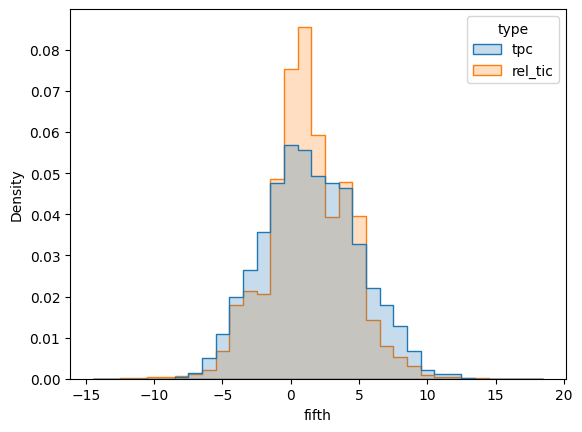

In [10]:
sns.histplot(data=df_rel[['tpc', 'rel_tic']].melt(var_name='type', value_name='fifth'),
             x='fifth',
             hue='type',
             stat='density',
             element='step',
             discrete=True)